# Supermarket sales

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.metrics import mean_squared_error,r2_score

In [8]:
df = pd.read_csv('super_market_sales.csv')

In [9]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [10]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [12]:
df.describe().style.background_gradient(cmap='Blues')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.587380,4.761905,15.379369,6.972700
std,26.494628,2.923431,11.708825,245.885335,234.176510,0.000000,11.708825,1.718580
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000
25%,32.875000,3.000000,5.924875,124.422375,118.497500,4.761905,5.924875,5.500000
50%,55.230000,5.000000,12.088000,253.848000,241.760000,4.761905,12.088000,7.000000
75%,77.935000,8.000000,22.445250,471.350250,448.905000,4.761905,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [14]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [15]:
df.duplicated().sum()

0

In [16]:
print(df.dtypes)

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [17]:
Product_counts = df['Product line'].value_counts()

# PRODUCT COUNTS

In [18]:
Product_counts                 #Fashion accesories are top , healthy and beauty are in least

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

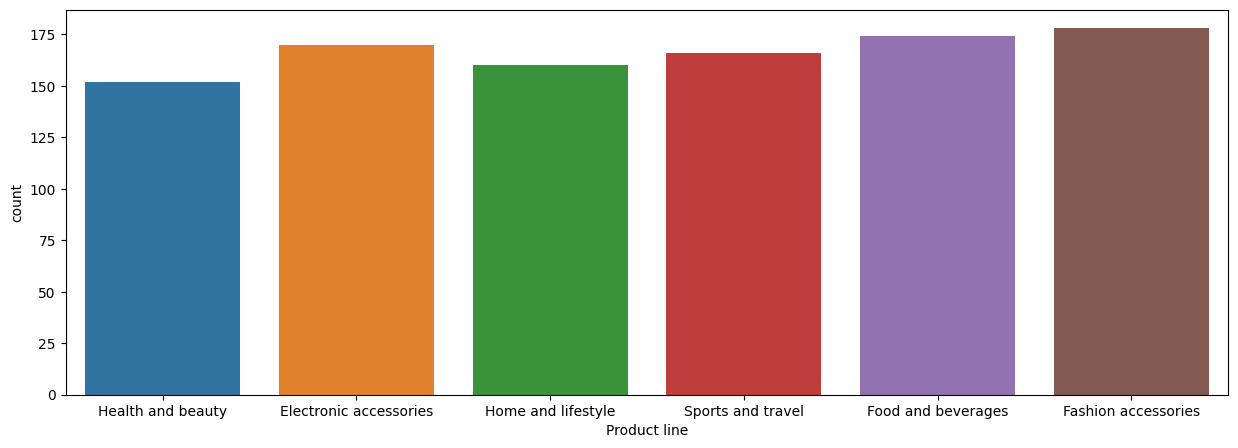

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Product line')
plt.show()

In [20]:
Membership = df[(df['Customer type']=='Member')]

# Membership

In [21]:
Membership

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,01-10-2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19:12,Ewallet,823.40,4.761905,41.1700,4.3
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,1/28/2019,15:46,Credit card,602.96,4.761905,30.1480,8.4
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7


In [22]:
Membership_Gender=Membership['Gender'].value_counts()

In [23]:
Membership_Gender       #Out of 501 membership 261 are females and 240 are males

Female    261
Male      240
Name: Gender, dtype: int64

In [24]:
Normal_type = df[(df['Customer type']=='Normal')]

# Normal

In [25]:
Normal_type

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,03-10-2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2/22/2019,18:35,Ewallet,174.90,4.761905,8.7450,6.6
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4


In [26]:
Normal_counts=Normal_type['Gender'].value_counts()

In [27]:
Normal_counts       #Out of 499 normal 259 are male & 240 are feamales. #Mostly females are from membership & males are normal

Male      259
Female    240
Name: Gender, dtype: int64

In [28]:
Most_Ratings=df[(df['Rating'] > 7)]

# Most Ratings

In [29]:
Most_Ratings

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,139-32-4183,A,Yangon,Member,Female,Sports and travel,97.48,9,43.8660,921.1860,3/14/2019,14:19,Ewallet,877.32,4.761905,43.8660,7.4
985,374-38-5555,B,Mandalay,Normal,Female,Fashion accessories,63.71,5,15.9275,334.4775,02-07-2019,19:30,Ewallet,318.55,4.761905,15.9275,8.5
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,1/28/2019,15:46,Credit card,602.96,4.761905,30.1480,8.4
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,03-10-2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8


In [30]:
Most_Ratings_city = Most_Ratings['City'].value_counts()

In [31]:
Most_Ratings_city         #Yangon is the city which gave high ratings

Yangon       172
Naypyitaw    167
Mandalay     142
Name: City, dtype: int64

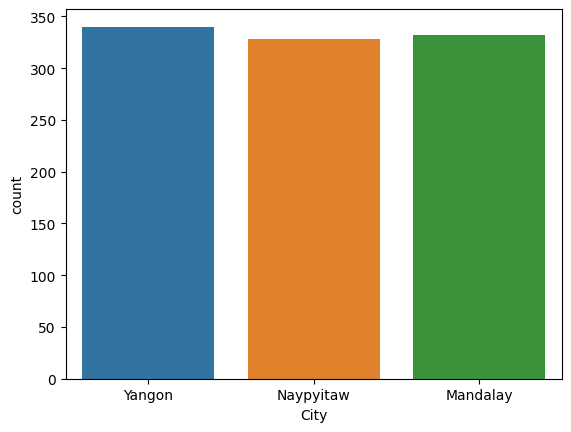

In [32]:
sns.countplot(data=df,x='City')           #
plt.show()

In [33]:
Most_Ratings_product = Most_Ratings['Product line'].value_counts()

# Mostly rated products

In [34]:
Most_Ratings_product            #Food and beverages are mostly rated products 

Food and beverages        93
Fashion accessories       86
Health and beauty         79
Electronic accessories    78
Home and lifestyle        75
Sports and travel         70
Name: Product line, dtype: int64

In [35]:
Mostly_sold_products = (df['Product line'])

# Mostly sold products

In [36]:
Mostly_sold_products.value_counts()        #Fashion accessories are mostly sold

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [37]:
Female_purchased_products = df[(df['Gender']=='Female')]

# Mostly purchased products by female

In [38]:
Female_purchased_products 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,01-10-2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.3000,804.3000,1/24/2019,18:10,Ewallet,766.00,4.761905,38.3000,6.0
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4


In [39]:
Mostly_purchased_f =Female_purchased_products ['Product line'].value_counts()

In [40]:
Mostly_purchased_f    #Female mostly purchased Fashion accessories 

Fashion accessories       96
Food and beverages        90
Sports and travel         88
Electronic accessories    84
Home and lifestyle        79
Health and beauty         64
Name: Product line, dtype: int64

In [41]:
Male_purchased_products = df[(df['Gender']=='Male')]

# Mostly purchased products by men

In [42]:
Male_purchased_products

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.1020,107.1420,03-09-2019,17:03,Cash,102.04,4.761905,5.1020,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,03-10-2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2/22/2019,18:35,Ewallet,174.90,4.761905,8.7450,6.6
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7


In [43]:
Mostly_purchased_M =Male_purchased_products ['Product line'].value_counts()

In [44]:
Mostly_purchased_M    # Male mostly purchased Health & beauty products  

Health and beauty         88
Electronic accessories    86
Food and beverages        84
Fashion accessories       82
Home and lifestyle        81
Sports and travel         78
Name: Product line, dtype: int64

In [45]:
Payment_type = df['Payment'].value_counts()

# Payment Type

In [46]:
Payment_type            #Most of the people did payment by Ewallet 

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

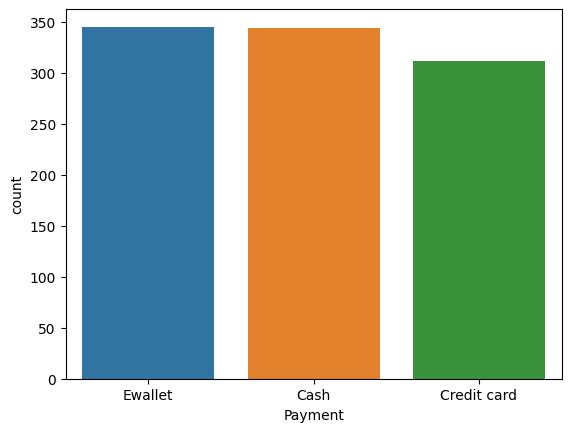

In [47]:
sns.countplot(data=df,x='Payment')           #
plt.show()

In [48]:
Preferred_branch = df['Branch'].value_counts()

# Preffered Branch

In [49]:
Preferred_branch         # A is the preffered branch 

A    340
B    332
C    328
Name: Branch, dtype: int64

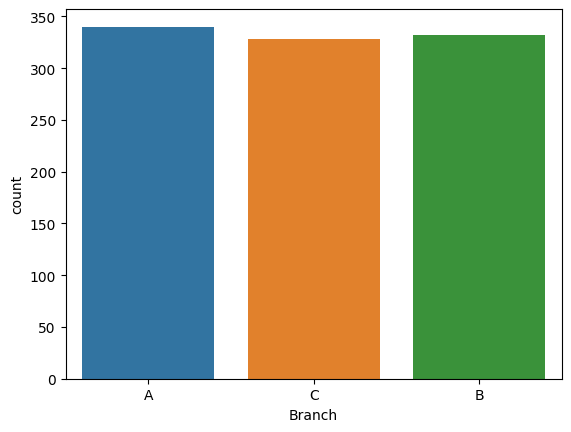

In [50]:
sns.countplot(data=df,x='Branch')           
plt.show()

In [51]:
df1= pd.read_csv('Super_market_sales.csv')

In [52]:
df1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# Extracting month and year from Date Column

In [53]:
df1['Month'] = pd.DatetimeIndex(df1['Date']).month       # Extracting month and year from date column       
df1['Year'] = pd.DatetimeIndex(df1['Date']).year

In [54]:
df1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,1,2019
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,3,2019
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7,2,2019
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,2,2019


In [55]:
df1 = df1.drop(['Invoice ID', 'Date','Time'], axis=1)     # Deleting unneccesary columns

In [56]:
df1

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,1,2019
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,3,2019
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,3,2019
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,1,2019
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2,1,2019
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4,3,2019
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7,2,2019
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1,2,2019


In [57]:
import ipywidgets as widgets                #creating  widgets  

In [58]:
import seaborn as sns

# Widgets

In [59]:
x1 = widgets.Dropdown(
    options=df1.columns,
    value=df1.columns[0],
    description='X_val:',
    disabled=False,
    )

def xtake(val1):
    print('first Function', val1)
    
    x2 = widgets.Dropdown(
    options=['lineplot','scatterplot','boxplot','barplot'],
    value='lineplot',
    description='Graphs:',
    disabled=False,
    )
    
    def graphviz2(val2):
        print('Second Function',val2)
        
        if val2 == 'lineplot':
            sns.lineplot(x = val1, y = 'Payment', data = df1)
        
        if val2 == 'scatterplot':
            sns.scatterplot(x = val1, y = 'Payment', data = df1)
        
        if val2 == 'boxplot':
            sns.boxplot(x = val1, y = 'Payment' , data = df1)
            
        if val2 == 'barplot':
            sns.barplot(x = val1, y = 'Payment' , data = df1)
            
    widgets.interact(graphviz2,val2=x2)

In [60]:
widgets.interact(xtake,val1=x1)         #select wisely by using dropdown option for variables and graphs 

interactive(children=(Dropdown(description='X_val:', options=('Branch', 'City', 'Customer type', 'Gender', 'Pr…

<function __main__.xtake(val1)>

In [61]:
df1

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,1,2019
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,3,2019
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,3,2019
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,1,2019
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2,1,2019
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4,3,2019
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7,2,2019
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1,2,2019


In [62]:
df1.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Month                      0
Year                       0
dtype: int64

# Fitting the columns with labelencoder

In [63]:
from sklearn.preprocessing import LabelEncoder        #fitting the columns with labelencoder

In [64]:
lb=LabelEncoder()

In [65]:
df1['Branch']=lb.fit_transform(df1['Branch'])

In [66]:
df1['City']=lb.fit_transform(df1['City'])

In [67]:
df1['Customer type']=lb.fit_transform(df1['Customer type'])

In [68]:
df1['Gender']=lb.fit_transform(df1['Gender'])

In [69]:
df1['Product line']=lb.fit_transform(df1['Product line'])

In [70]:
df1['Payment']=lb.fit_transform(df1['Payment'])

In [71]:
X = df1.drop('Quantity', axis=1)

In [72]:
y = df1['Quantity']

In [73]:
X

,Branch,City,Customer type,Gender,Product line,Unit price,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year
0,0,2,0,0,3,74.69,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1,1,2019
1,2,1,1,0,0,15.28,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6,3,2019
2,0,2,1,1,4,46.33,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4,3,2019
3,0,2,0,1,3,58.22,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4,1,2019
4,0,2,1,1,5,86.31,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,1,3,40.35,2.0175,42.3675,2,40.35,4.761905,2.0175,6.2,1,2019
996,1,0,1,0,4,97.38,48.6900,1022.4900,2,973.80,4.761905,48.6900,4.4,3,2019
997,0,2,0,1,2,31.84,1.5920,33.4320,0,31.84,4.761905,1.5920,7.7,2,2019
998,0,2,1,1,4,65.82,3.2910,69.1110,0,65.82,4.761905,3.2910,4.1,2,2019


In [74]:
y

0       7
1       5
2       7
3       8
4       7
       ..
995     1
996    10
997     1
998     1
999     7
Name: Quantity, Length: 1000, dtype: int64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
X_train

,Branch,City,Customer type,Gender,Product line,Unit price,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year
698,0,2,0,1,0,69.58,31.3110,657.5310,1,626.22,4.761905,31.3110,7.8,2,2019
310,1,0,0,1,5,79.93,23.9790,503.5590,0,479.58,4.761905,23.9790,5.5,1,2019
686,1,0,0,0,5,64.83,6.4830,136.1430,1,129.66,4.761905,6.4830,8.0,1,2019
754,2,1,0,0,1,84.87,12.7305,267.3405,2,254.61,4.761905,12.7305,7.4,1,2019
437,0,2,1,1,4,33.99,10.1970,214.1370,1,203.94,4.761905,10.1970,7.7,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,1,0,1,0,3,84.09,37.8405,794.6505,0,756.81,4.761905,37.8405,8.0,2,2019
537,0,2,1,1,4,97.94,4.8970,102.8370,2,97.94,4.761905,4.8970,6.9,3,2019
746,1,0,0,1,1,65.23,32.6150,684.9150,1,652.30,4.761905,32.6150,5.2,1,2019
729,1,0,0,0,4,52.18,18.2630,383.5230,0,365.26,4.761905,18.2630,9.3,3,2019


In [77]:
X_test

,Branch,City,Customer type,Gender,Product line,Unit price,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year
466,2,1,0,0,3,37.15,13.0025,273.0525,1,260.05,4.761905,13.0025,7.7,2,2019
783,2,1,1,0,4,44.01,17.6040,369.6840,0,352.08,4.761905,17.6040,8.8,3,2019
182,0,2,0,1,5,15.50,7.7500,162.7500,2,155.00,4.761905,7.7500,8.0,3,2019
534,0,2,1,0,4,28.32,7.0800,148.6800,2,141.60,4.761905,7.0800,6.2,3,2019
710,0,2,0,1,2,80.62,24.1860,507.9060,0,483.72,4.761905,24.1860,9.1,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,0,1,1,2,72.39,7.2390,152.0190,1,144.78,4.761905,7.2390,8.1,1,2019
88,0,2,1,1,5,42.47,2.1235,44.5935,0,42.47,4.761905,2.1235,5.7,1,2019
943,0,2,1,1,3,50.79,12.6975,266.6475,1,253.95,4.761905,12.6975,5.3,2,2019
282,0,2,1,0,5,15.34,0.7670,16.1070,0,15.34,4.761905,0.7670,6.5,1,2019


In [78]:
 y_train

698     9
310     6
686     2
754     3
437     6
       ..
232     9
537     1
746    10
729     7
972     7
Name: Quantity, Length: 800, dtype: int64

In [79]:
 y_test

466     7
783     8
182    10
534     5
710     6
       ..
573     2
88      1
943     5
282     1
236     5
Name: Quantity, Length: 200, dtype: int64

In [80]:
Lr = LinearRegression()

In [81]:
Lr.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = Lr.predict(X_test)

In [83]:
y_pred

array([ 6.25790084,  7.01831098,  6.54960644,  5.2415428 ,  6.25133539,
        5.28955059,  3.07374455,  5.62358804,  7.53205682,  5.58330825,
        6.20613003,  4.43610334,  2.18563044,  4.43667014,  6.2242672 ,
       11.9072942 ,  6.96431157,  6.10724784, 10.47094397,  3.7615317 ,
        2.30280806,  5.8731333 ,  5.82209855,  5.97468853,  5.46332285,
        6.92889851, 10.29252418,  9.00037566,  5.27668573,  4.78165415,
        4.07354058,  0.62425926,  0.27324296,  4.75429631,  7.82173393,
        1.83716884,  3.78787636,  7.69124839,  7.73046183,  6.64476922,
        8.02762329, 10.37730396,  4.6067473 ,  4.4418943 ,  4.60817936,
        1.38284934,  5.41761604,  4.89840583,  7.11050255,  4.81262573,
        6.888211  , 11.44560687,  1.01376286,  1.93053225,  5.2930843 ,
        4.86375105,  5.34601407,  3.53075844,  7.987696  ,  2.17144325,
        6.7696383 ,  6.99119561,  2.10413036,  8.57970596,  6.11576252,
        5.87571147,  6.07427916,  4.24335862,  5.44943892,  3.81

# Accuracy score

In [84]:
Lr.score(X_train,y_train)  

0.8225482328993214

In [85]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 1.71


In [86]:
print('R-squared: %.2f' % r2_score(y_test, y_pred))

R-squared: 0.79


In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix

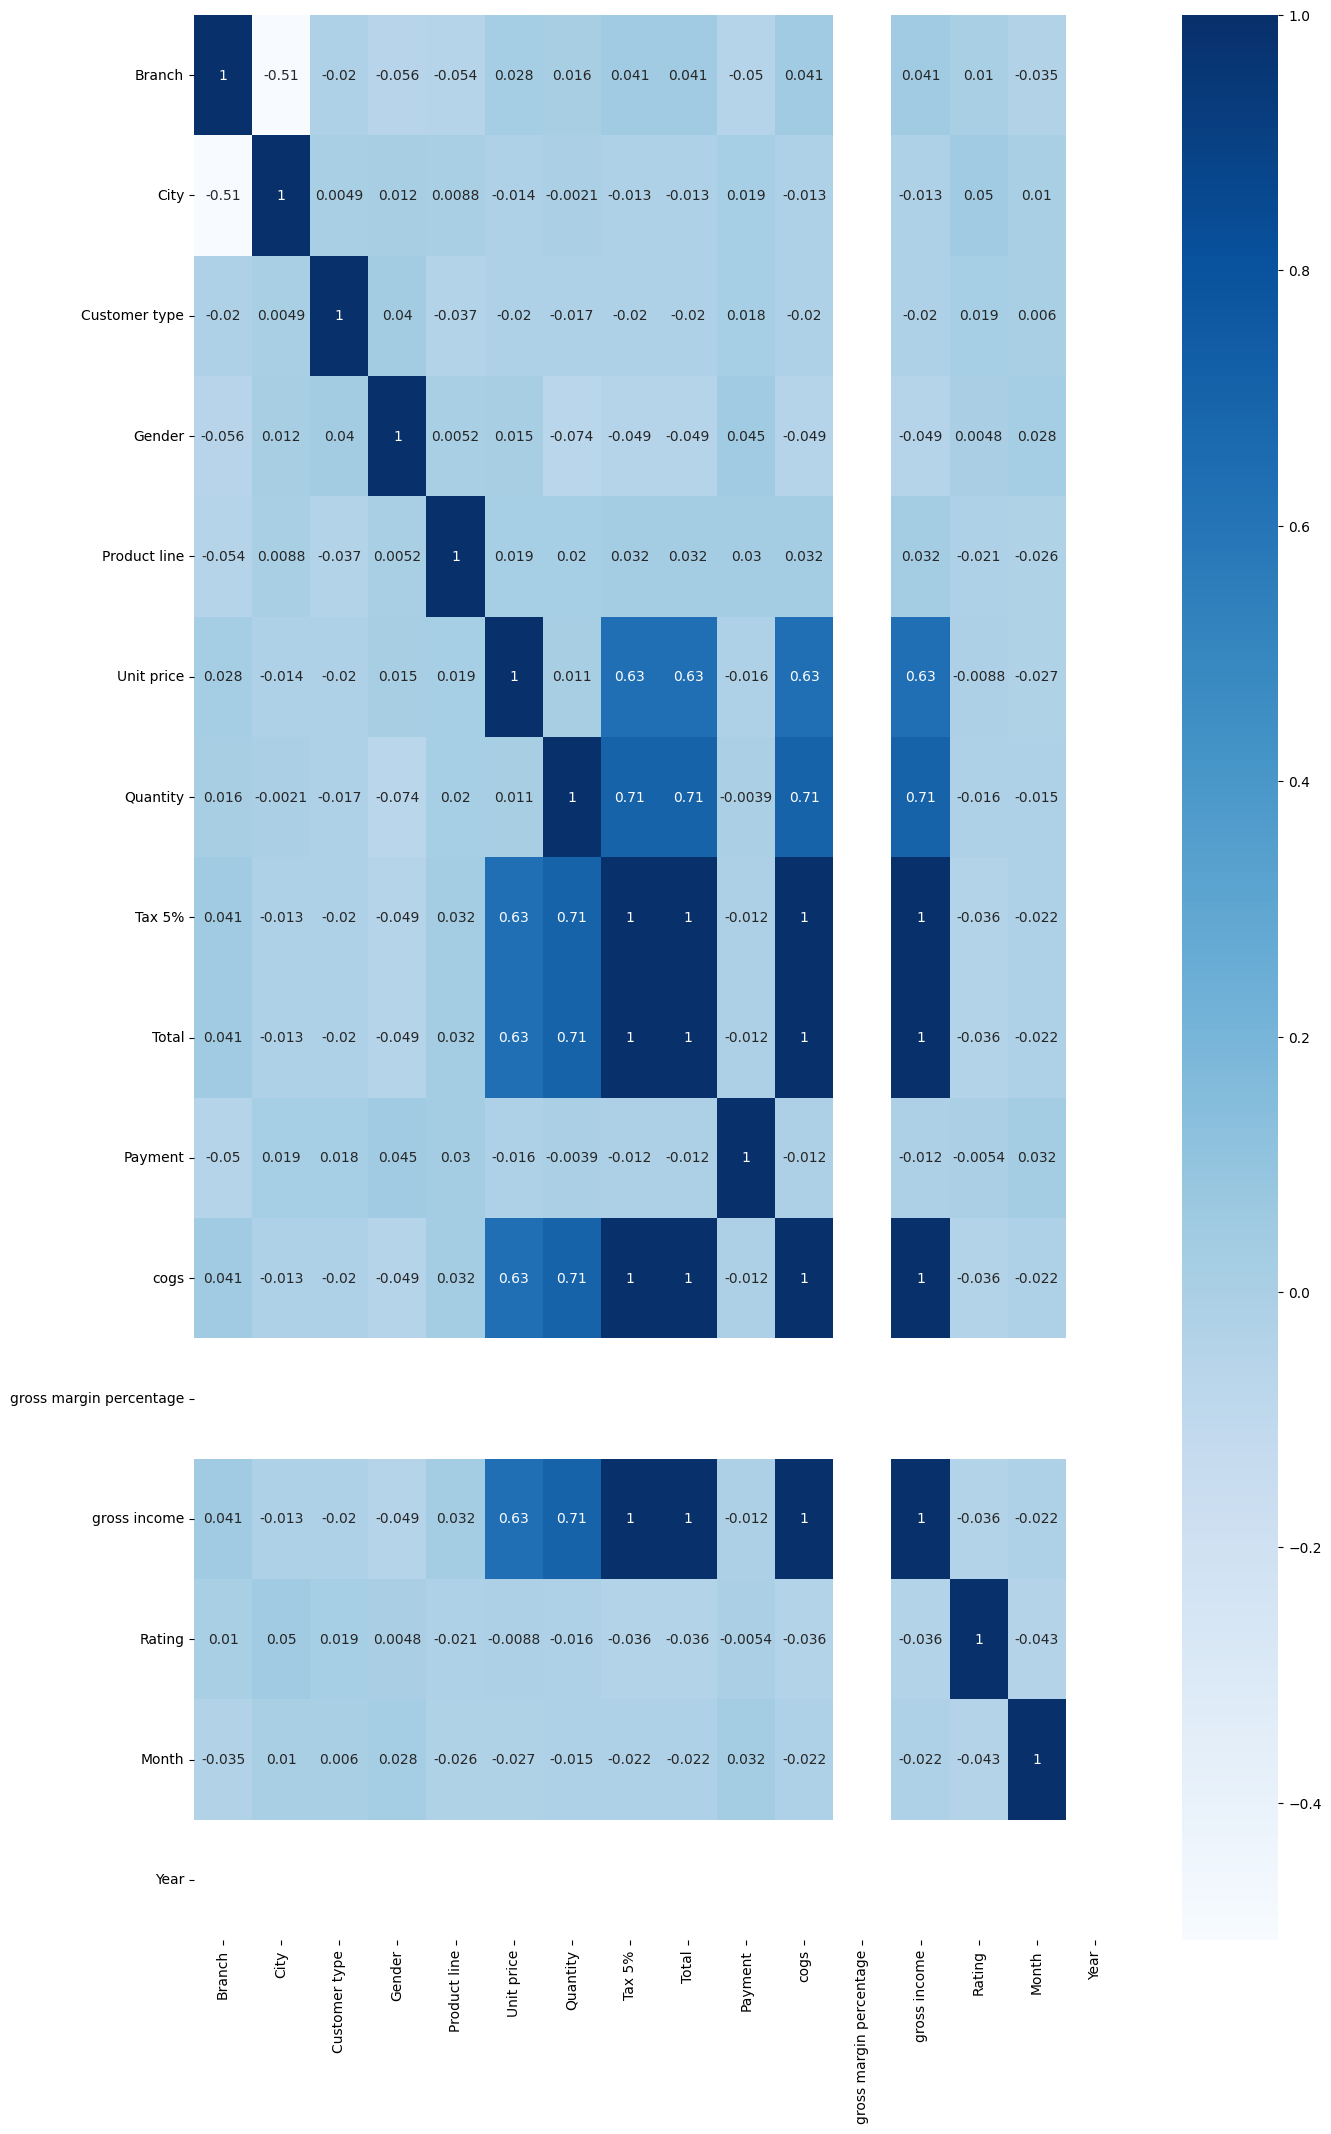

In [88]:
plt.figure(figsize=(15,25))
cmap="PiYG"
hm = sns.heatmap(data=df1.corr(),cmap="Blues",annot=True)
plt.show()

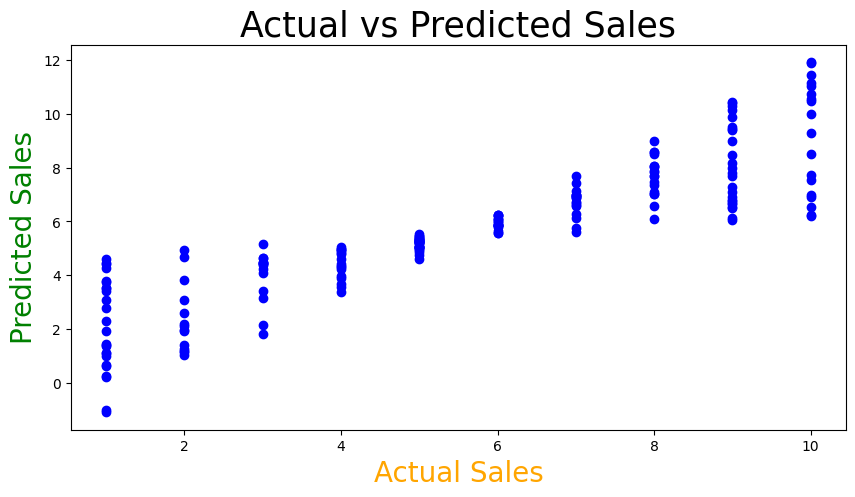

In [89]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred,color ='blue')
plt.xlabel('Actual Sales',fontdict={'fontsize':20,'color':'Orange','fontweight':10})
plt.ylabel('Predicted Sales',fontdict={'fontsize':20,'color':'Green','fontweight':10})
plt.title('Actual vs Predicted Sales',fontdict={'fontsize':25,'color':'black','fontweight':10})
plt.show()

#                                THE END                          

# THANK YOU